<a href="https://colab.research.google.com/github/NamanChaudhary1/DailyAssignments/blob/main/Assignment_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Solutions

Q1. Create a file that contains 1000 lines of random strings

In [2]:
# Set the file path
file_path <- "random_strings.txt"

# Open the file for writing
file_conn <- file(file_path, "w")

# Generate and write 1000 lines of random strings
for (i in 1:1000) {
  random_string <- paste(sample(letters, 10, replace = TRUE), collapse = "")
  writeLines(random_string, file_conn)
}

# Close the file connection
close(file_conn)


Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform
the following operations:

(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.

(ii) Replace all the NA values with the average of the column value.

(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns
having correlation <=0.7.

(iv) Normalize all the values in the dataset between 0 and 10.

(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.


In [3]:
set.seed(42)

In [4]:
# Create a random dataset of 100 rows and 30 columns
dataset <- matrix(runif(100 * 30, min = 1, max = 200), nrow = 100)

# Convert the matrix to a data frame
dataset <- as.data.frame(dataset)

(i) Replace values with NA between [10, 60] and count rows with missing values

In [5]:
dataset[10:60, ] <- NA
missing_values_count <- sum(rowSums(is.na(dataset)) > 0)
print(paste("Number of rows with missing values:", missing_values_count))


[1] "Number of rows with missing values: 51"


(ii) Replace NA values with the average of the column

In [6]:
dataset <- apply(dataset, 2, function(x) replace(x, is.na(x), mean(x, na.rm = TRUE)))

(iii) Find the Pearson correlation among columns and plot heatmap. Also select columns having correlation <= 0.7

In [7]:
correlation_matrix <- cor(dataset, use = "pairwise.complete.obs")
correlation_threshold <- 0.7
lower_correlation_indices <- which(upper.tri(correlation_matrix) & abs(correlation_matrix) <= correlation_threshold, arr.ind = TRUE)
lower_correlation_columns <- unique(c(lower_correlation_indices[, 1], lower_correlation_indices[, 2]))


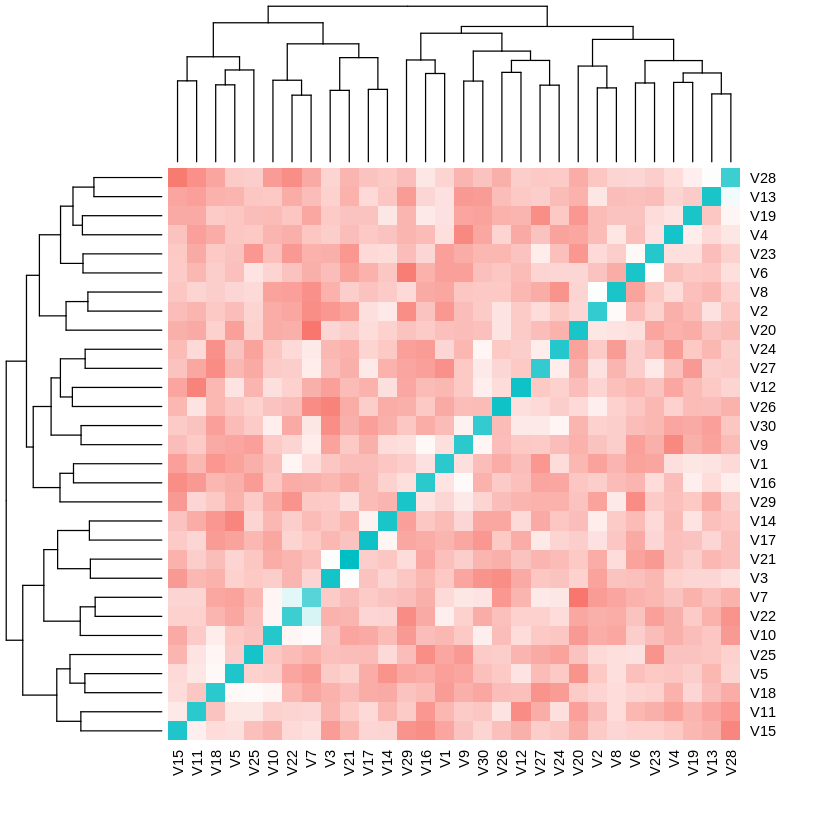

In [8]:
# Plotting the heatmap
heatmap(correlation_matrix, col = colorRampPalette(c("#F8766D", "#FFFFFF", "#00BFC4"))(100))

(iv) Normalize all the values in the dataset between 0 and 10

In [12]:
normalized_dataset <- scale(dataset, center = FALSE, scale = apply(dataset, 2, max, na.rm = TRUE) / 10)

(v) Replace all the values in the dataset with 1 if value <= 0.5 else with 0

In [13]:
dataset_binary <- ifelse(dataset <= 0.5, 1, 0)

Q3. Create a random dataset of 500 rows and 10 columns.

Columns 1 to 4 are defined between [-10, 10];

Columns 5 to 8 are defined between [10, 20];

Columns 9 to 10 are defined between [-100, 100].


Apply following clustering algorithms; 
determine the optimal number of clusters and plot distance metric
graph using each algorithm.

(i) K-Mean clustering

(ii) Hierarchical clustering


In [14]:
set.seed(42)

In [15]:
# Create a random dataset of 500 rows and 10 columns
dataset <- matrix(NA, nrow = 500, ncol = 10)
dataset[, 1:4] <- runif(500, -10, 10)
dataset[, 5:8] <- runif(500, 10, 20)
dataset[, 9:10] <- runif(500, -100, 100)

(i) K-Means Clustering

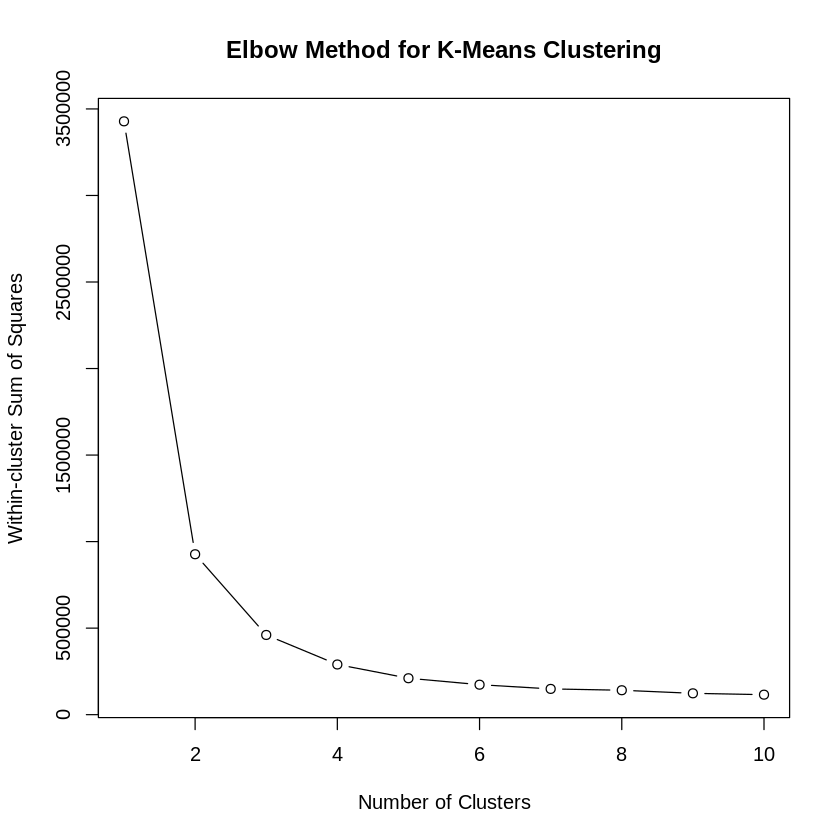

In [16]:
wss <- sapply(1:10, function(k) kmeans(dataset, centers = k)$tot.withinss)
plot(1:10, wss, type = "b", xlab = "Number of Clusters", ylab = "Within-cluster Sum of Squares",
     main = "Elbow Method for K-Means Clustering")


In [17]:
# Perform K-Means clustering with the chosen number of clusters
k <- 3  # Change this number based on the elbow plot
kmeans_result <- kmeans(dataset, centers = k)
cluster_labels_kmeans <- kmeans_result$cluster

Plot distance metric graph for K-Means clustering


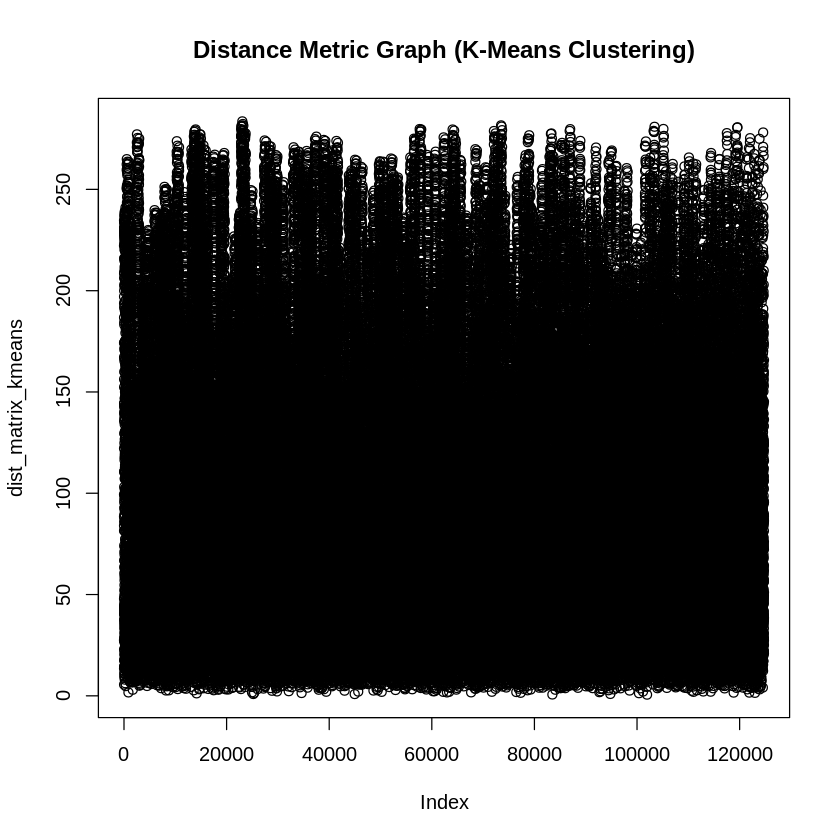

In [18]:
dist_matrix_kmeans <- dist(dataset)
plot(dist_matrix_kmeans, main = "Distance Metric Graph (K-Means Clustering)")


(ii) Hierarchical Clustering

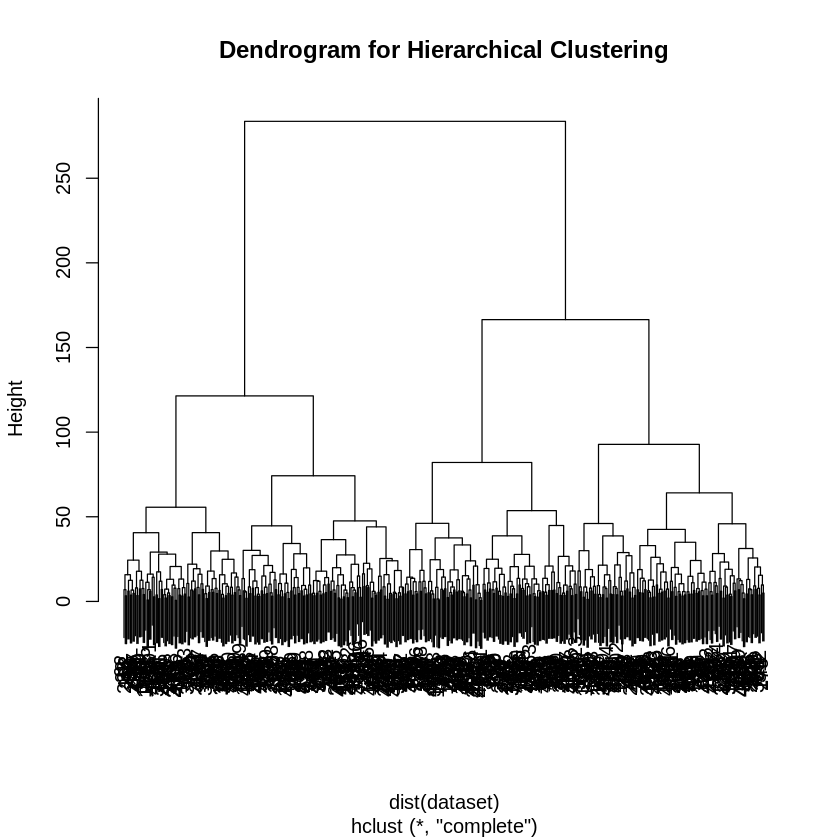

In [19]:
dendrogram <- hclust(dist(dataset))
plot(dendrogram, main = "Dendrogram for Hierarchical Clustering")

In [20]:
k <- 4 
hierarchical_result <- cutree(dendrogram, k = k)
cluster_labels_hierarchical <- hierarchical_result

Q4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].

Perform the following operations:

(i) Plot scatter graph between Column 5 and Column 6.

(ii) Plot histogram of each column in single graph.

(iii) Plot the Box plot of each column in single graph.


In [23]:
dataset <- matrix(runif(600 * 15, min = -100, max = 100), nrow = 600)

In [24]:
dataset <- as.data.frame(dataset)

(i) Plot scatter graph between Column 5 and Column 6

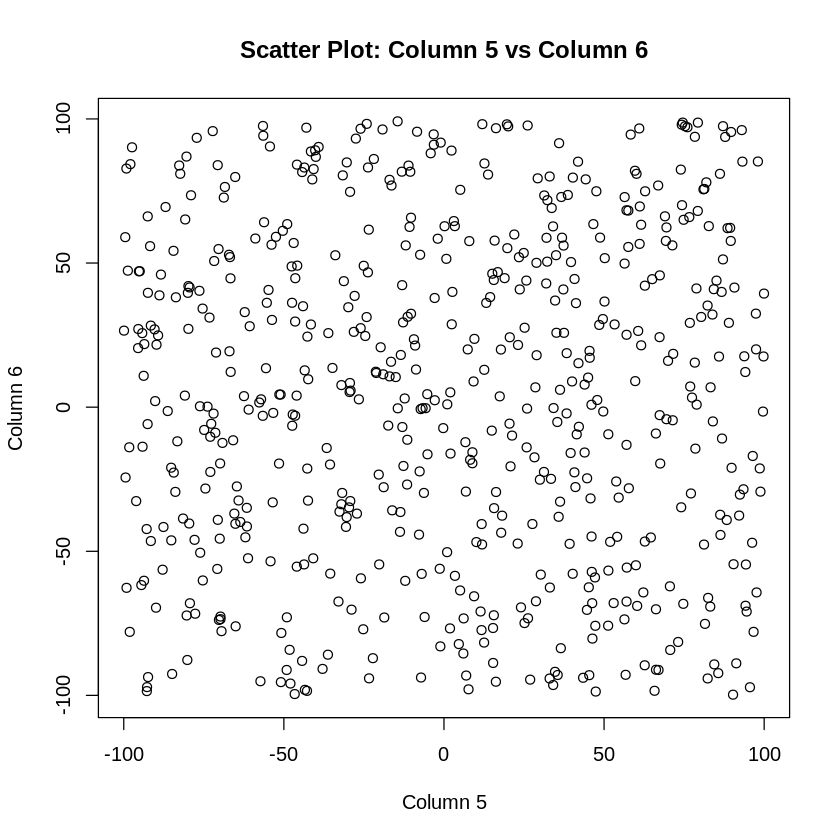

In [25]:
plot(dataset[, 5], dataset[, 6], xlab = "Column 5", ylab = "Column 6",
     main = "Scatter Plot: Column 5 vs Column 6")


(ii) Plot histogram of each column in a single graph

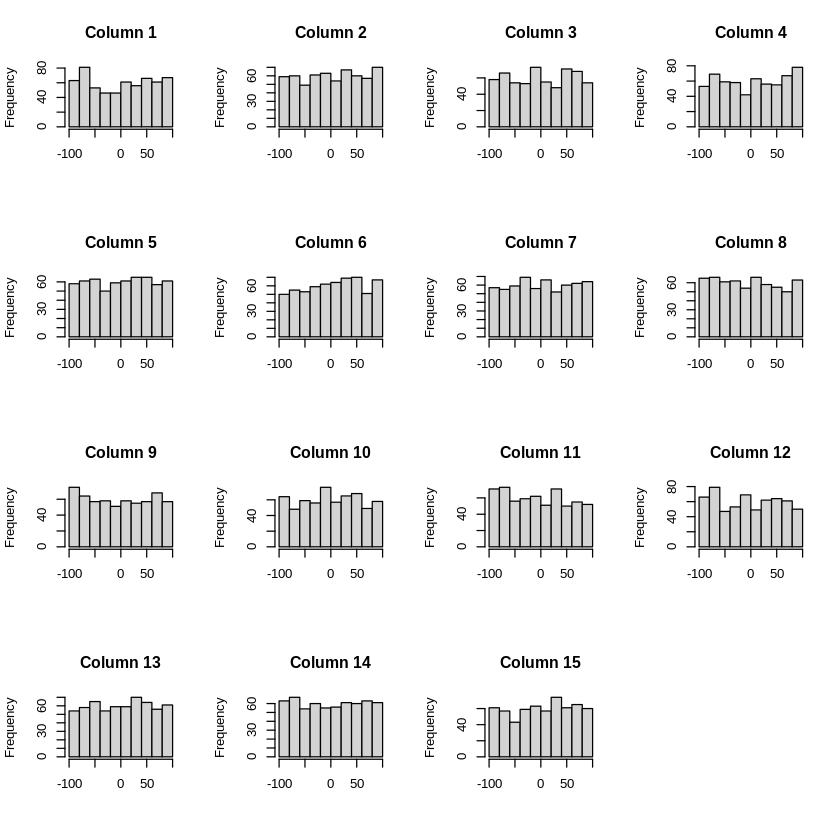

In [26]:
par(mfrow = c(4, 4))  # Set the layout for the subplots (adjust as needed)
for (i in 1:15) {
  hist(dataset[, i], main = paste("Column", i), xlab = "", ylab = "Frequency")
}

(iii) Plot the box plot of each column in a single graph

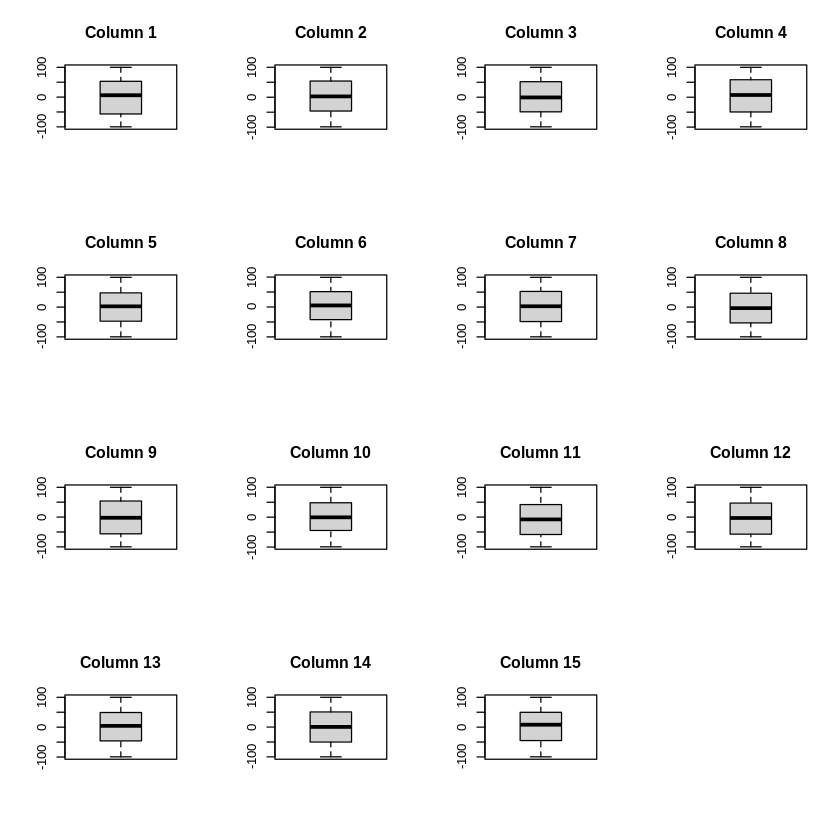

In [27]:
par(mfrow = c(4, 4))  # Set the layout for the subplots (adjust as needed)
for (i in 1:15) {
  boxplot(dataset[, i], main = paste("Column", i))
}

Q5. Create a random dataset of 500 rows and 5 columns:

All the values are defined between [5,10].
Perform the following operations:

(i) Perform t-Test on each column.

(ii) Perform Wilcoxon Signed Rank Test on each column.

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4


In [28]:
dataset <- matrix(runif(500 * 5, min = 5, max = 10), nrow = 500)

In [29]:
dataset <- as.data.frame(dataset)

(i) Perform t-Test on each column

In [30]:
t_test_results <- lapply(dataset, function(col) t.test(col))

(ii) Perform Wilcoxon Signed Rank Test on each column

In [31]:
wilcox_test_results <- lapply(dataset, function(col) wilcox.test(col))

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [32]:
column_3 <- dataset[, 3]
column_4 <- dataset[, 4]

In [33]:
t_test_column_3_4 <- t.test(column_3, column_4)
wilcox_test_column_3_4 <- wilcox.test(column_3, column_4)

In [34]:
print(t_test_results)
print(wilcox_test_results)
print(t_test_column_3_4)
print(wilcox_test_column_3_4)

$V1

	One Sample t-test

data:  col
t = 114.69, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.379529 7.636762
sample estimates:
mean of x 
 7.508145 


$V2

	One Sample t-test

data:  col
t = 114.28, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.376903 7.634989
sample estimates:
mean of x 
 7.505946 


$V3

	One Sample t-test

data:  col
t = 112.29, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.311972 7.572400
sample estimates:
mean of x 
 7.442186 


$V4

	One Sample t-test

data:  col
t = 115.25, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.411415 7.668481
sample estimates:
mean of x 
 7.539948 


$V5

	One Sample t-test

data:  col
t = 119.08, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not